# Prescribed vegetation cover
Preliminary results showed generally an off-set between observed and modelled vegetation cover. Here, vegetation cover derived from remote sensing (Donohue et al. 2008) is used as input for the VOM, and compared to the VOM-results that optimize the vegetation cover.

## Observed and constructed timeseries of vegetation cover

In [1]:
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook

In [3]:
#read seasonal projective cover data used as input for the VOM
pc_howard = np.genfromtxt("../../work/additional_analyses/prescribed_cover/HowardSprings/input/perc_cov.txt")  #mm/d
pc_adelaide = np.genfromtxt("../../work/additional_analyses/prescribed_cover/AdelaideRiver/input/perc_cov.txt")  #mm/d
pc_litch = np.genfromtxt("../../work/additional_analyses/prescribed_cover/Litchfield/input/perc_cov.txt")  #mm/d
pc_daly = np.genfromtxt("../../work/additional_analyses/prescribed_cover/DalyUncleared/input/perc_cov.txt")  #mm/d
pc_dry = np.genfromtxt("../../work/additional_analyses/prescribed_cover/DryRiver/input/perc_cov.txt")  #mm/d
pc_sturt = np.genfromtxt("../../work/additional_analyses/prescribed_cover/SturtPlains/input/perc_cov.txt")  #mm/d

time = np.arange(datetime(int(pc_howard[0,3]),int(pc_howard[0,2]),int(pc_howard[0,1])), 
                  datetime(int(pc_howard[-1,3]),int(pc_howard[-1,2]),int(pc_howard[-1,1]))+timedelta(days=1), 
                  timedelta(days=1)).astype(datetime)


In [4]:
#read seasonal projective cover data used as input for the VOM
pc2_howard = np.genfromtxt("../../work/additional_analyses/prescribed_cover2/HowardSprings/input/perc_cov.txt")  #mm/d
pc2_adelaide = np.genfromtxt("../../work/additional_analyses/prescribed_cover2/AdelaideRiver/input/perc_cov.txt")  #mm/d
pc2_litch = np.genfromtxt("../../work/additional_analyses/prescribed_cover2/Litchfield/input/perc_cov.txt")  #mm/d
pc2_daly = np.genfromtxt("../../work/additional_analyses/prescribed_cover2/DalyUncleared/input/perc_cov.txt")  #mm/d
pc2_dry = np.genfromtxt("../../work/additional_analyses/prescribed_cover2/DryRiver/input/perc_cov.txt")  #mm/d
pc2_sturt = np.genfromtxt("../../work/additional_analyses/prescribed_cover2/SturtPlains/input/perc_cov.txt")  #mm/d

time2 = np.arange(datetime(int(pc2_howard[0,3]),int(pc2_howard[0,2]),int(pc2_howard[0,1])), 
                  datetime(int(pc2_howard[-1,3]),int(pc2_howard[-1,2]),int(pc2_howard[-1,1]))+timedelta(days=1), 
                  timedelta(days=1)).astype(datetime)


In [5]:
#read in fpar-data
fparv5_dates = np.genfromtxt('../../data/fPAR/dates_v5', dtype='str', delimiter=',')
fparv5_dates = pd.to_datetime(fparv5_dates[:,1], format="%Y%m")
dates_pd = pd.date_range(fparv5_dates[0], fparv5_dates[-1], freq='MS')

fparv5_howard = np.loadtxt('../../data/fPAR/fpar_howard_v5.txt',delimiter=',', usecols=3 )
fparv5_howard[fparv5_howard == -999] = np.nan
fparv5_howard_pd = pd.Series(fparv5_howard, index = fparv5_dates)
fparv5_howard_pd = fparv5_howard_pd.resample('MS').max()


fparv5_adelaide = np.loadtxt('../../data/fPAR/fpar_adelaide_v5.txt',delimiter=',', usecols=3 )
fparv5_adelaide[fparv5_adelaide == -999] = np.nan
fparv5_adelaide_pd = pd.Series(fparv5_adelaide, index = fparv5_dates)
fparv5_adelaide_pd = fparv5_adelaide_pd.resample('MS').max()

fparv5_daly = np.loadtxt('../../data/fPAR/fpar_daly_v5.txt',delimiter=',', usecols=3 )
fparv5_daly[fparv5_daly == -999] = np.nan
fparv5_daly_pd = pd.Series(fparv5_daly, index = fparv5_dates)
fparv5_daly_pd = fparv5_daly_pd.resample('MS').max()

fparv5_dry = np.loadtxt('../../data/fPAR/fpar_dry_v5.txt',delimiter=',', usecols=3 )
fparv5_dry[fparv5_dry == -999] = np.nan
fparv5_dry_pd = pd.Series(fparv5_dry, index = fparv5_dates)
fparv5_dry_pd = fparv5_dry_pd.resample('MS').max()

fparv5_sturt = np.loadtxt('../../data/fPAR/fpar_sturt_v5.txt',delimiter=',', usecols=3 )
fparv5_sturt[fparv5_sturt == -999] = np.nan
fparv5_sturt_pd = pd.Series(fparv5_sturt, index = fparv5_dates)
fparv5_sturt_pd = fparv5_sturt_pd.resample('MS').max()



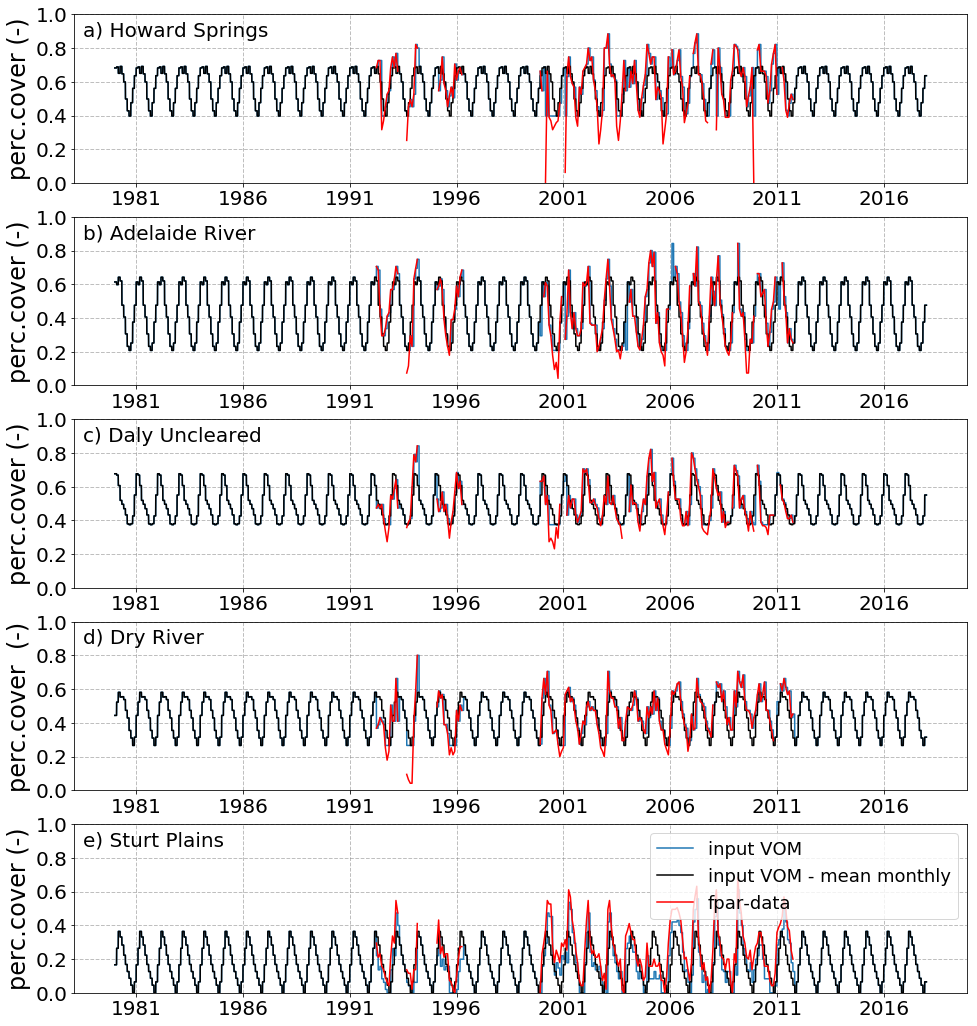

In [6]:
pc_t = [ 0.3971929824561404, 0.20771929824561405, 
        0.37473684210526315, 0.26616541353383455, 0, 0.07443609022556391]
pc_g_max_hs = np.max(fparv5_howard_pd) - pc_t[0]
pc_g_max_ade = np.max(fparv5_adelaide_pd) - pc_t[1]
pc_g_max_dal = np.max(fparv5_daly_pd) - pc_t[2]
pc_g_max_dry = np.max(fparv5_dry_pd) - pc_t[3]
pc_g_max_sturt = np.nanmax(fparv5_sturt) - pc_t[5]

#howardsprings
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(16,18))
ax = axes.flat
ax[0].plot(time, pc_howard[:,4] + pc_t[0], label = "input VOM")
ax[0].plot(time2, pc2_howard[:,4] + pc_t[0],color="black", label = "mean monthly proj. cover")
ax[0].plot(fparv5_howard_pd.index, fparv5_howard_pd/0.95, color="red", label="fpar-data")

#ax.set_ylabel("Fpar [-]", fontsize=20)
#ax.set_xlim([datetime(2006,1, 1), datetime( 2006 ,12, 31)]) 

for i in range(0,5):
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax[i].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
    ax[i].set_ylabel("perc.cover (-)", fontsize=24)

    ax[i].set_ylim([0,1])

ax[0].text(0.01, 0.9, "a) Howard Springs", ha='left', va='center', fontsize=20, transform=ax[0].transAxes)
plt.legend(fontsize=18,loc='upper right')


#AdelaideRiver
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,3))        
ax[1].plot(time, pc_adelaide[:,4] + pc_t[1], label = "input VOM")
ax[1].plot(time2, pc2_adelaide[:,4] + pc_t[1],color="black", label = "input VOM - mean monthly")
ax[1].plot(fparv5_adelaide_pd.index, fparv5_adelaide_pd/0.95, color="red", label="fpar-data")
ax[1].set_ylabel("perc.cover (-)", fontsize=24)
#ax.set_xlim([datetime(2010,1, 1), datetime( 2010 ,12, 31)]) 

#ax.set_ylim([0,1])
ax[1].text(0.01, 0.9, "b) Adelaide River", ha='left', va='center', fontsize=20,transform=ax[1].transAxes)
#for tick in ax.yaxis.get_major_ticks():
#    tick.label.set_fontsize(20)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(20)

plt.legend(fontsize=18, loc='upper right')


#DalyUncleared
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,3))        
ax[2].plot(time, pc_daly[:,4] + pc_t[2], label = "input VOM")
ax[2].plot(time2, pc2_daly[:,4] + pc_t[2], color="black", label = "input VOM - mean monthly")
ax[2].plot(fparv5_daly_pd.index, fparv5_daly_pd/0.95, color="red", label="fpar-data")
ax[2].set_ylabel("perc.cover (-)", fontsize=24)
#ax.set_ylabel("Fpar [-]", fontsize=20)
#ax.set_xlim([datetime(2010,1, 1), datetime( 2010 ,12, 31)]) 

#ax.set_ylim([0,1])
#ax.set_xlim([datetime(2007,1, 1), datetime( 2011 ,12, 31)]) 
ax[2].text(0.01, 0.9, "c) Daly Uncleared", ha='left', va='center', fontsize=20, transform=ax[2].transAxes)
#for tick in ax.yaxis.get_major_ticks():
#    tick.label.set_fontsize(20)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(20)
#ax.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

plt.legend(fontsize=18,loc='upper right')

#DryRiver
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,3))        
ax[3].plot(time, pc_dry[:,4] + pc_t[3], label = "input VOM")
ax[3].plot(time2, pc2_dry[:,4] + pc_t[3], color="black", label = "input VOM - mean monthly")
ax[3].plot(fparv5_dry_pd.index, fparv5_dry_pd/0.95, color="red", label="fpar-data")
ax[3].set_ylabel("perc.cover  (-)", fontsize=24)
#ax.set_xlim([datetime(2010,1, 1), datetime( 2010 ,12, 31)]) 

#ax[3].set_ylim([0,1])
#ax.set_xlim([datetime(2002,1, 1), datetime( 2006 ,12, 31)]) 
ax[3].text(0.01, 0.9, "d) Dry River", ha='left', va='center', fontsize=20,transform=ax[3].transAxes)
#for tick in ax.yaxis.get_major_ticks():
#    tick.label.set_fontsize(20)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(20)
#ax.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

plt.legend(fontsize=18, loc='upper right')

#SturtPlains
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,3))        
ax[4].plot(time, pc_sturt[:,4] + pc_t[4], label = "input VOM")
ax[4].plot(time, pc2_sturt[:,4] + pc_t[4],  color="black", label = "input VOM - mean monthly")
ax[4].plot(fparv5_sturt_pd.index, fparv5_sturt_pd/0.95, color="red", label="fpar-data")
#ax[4].set_ylabel("perc.cover (-)", fontsize=24)
#ax.set_ylabel("Fpar [-]", fontsize=20)
#ax.set_xlim([datetime(2010,1, 1), datetime( 2010 ,12, 31)]) 

#ax.set_ylim([0,1])
ax[4].text(0.01, 0.9, "e) Sturt Plains", ha='left', va='center', fontsize=20,transform=ax[4].transAxes)
#for tick in ax.yaxis.get_major_ticks():
#    tick.label.set_fontsize(20)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(20)
#ax.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

plt.legend(fontsize=18, loc='upper right')
plt.show()


**Figure S4.1.** Constructed timeseries of vegetation cover used as input for the VOM with the actual values supplemented by the mean monthly values (blue), and just the mean monthly values (black),  which are based on the monthly mean values of fPar-based vegetation cover (Donohue et al., 2008) for a) Howard Springs, b) Adelaide River, c) Daly Uncleared, d) Dry River and e) Sturt Plains. Observed fPar-based vegetation cover is shown in red. 

## Timeseries of modelled fluxes

<Figure size 1280x1520 with 0 Axes>

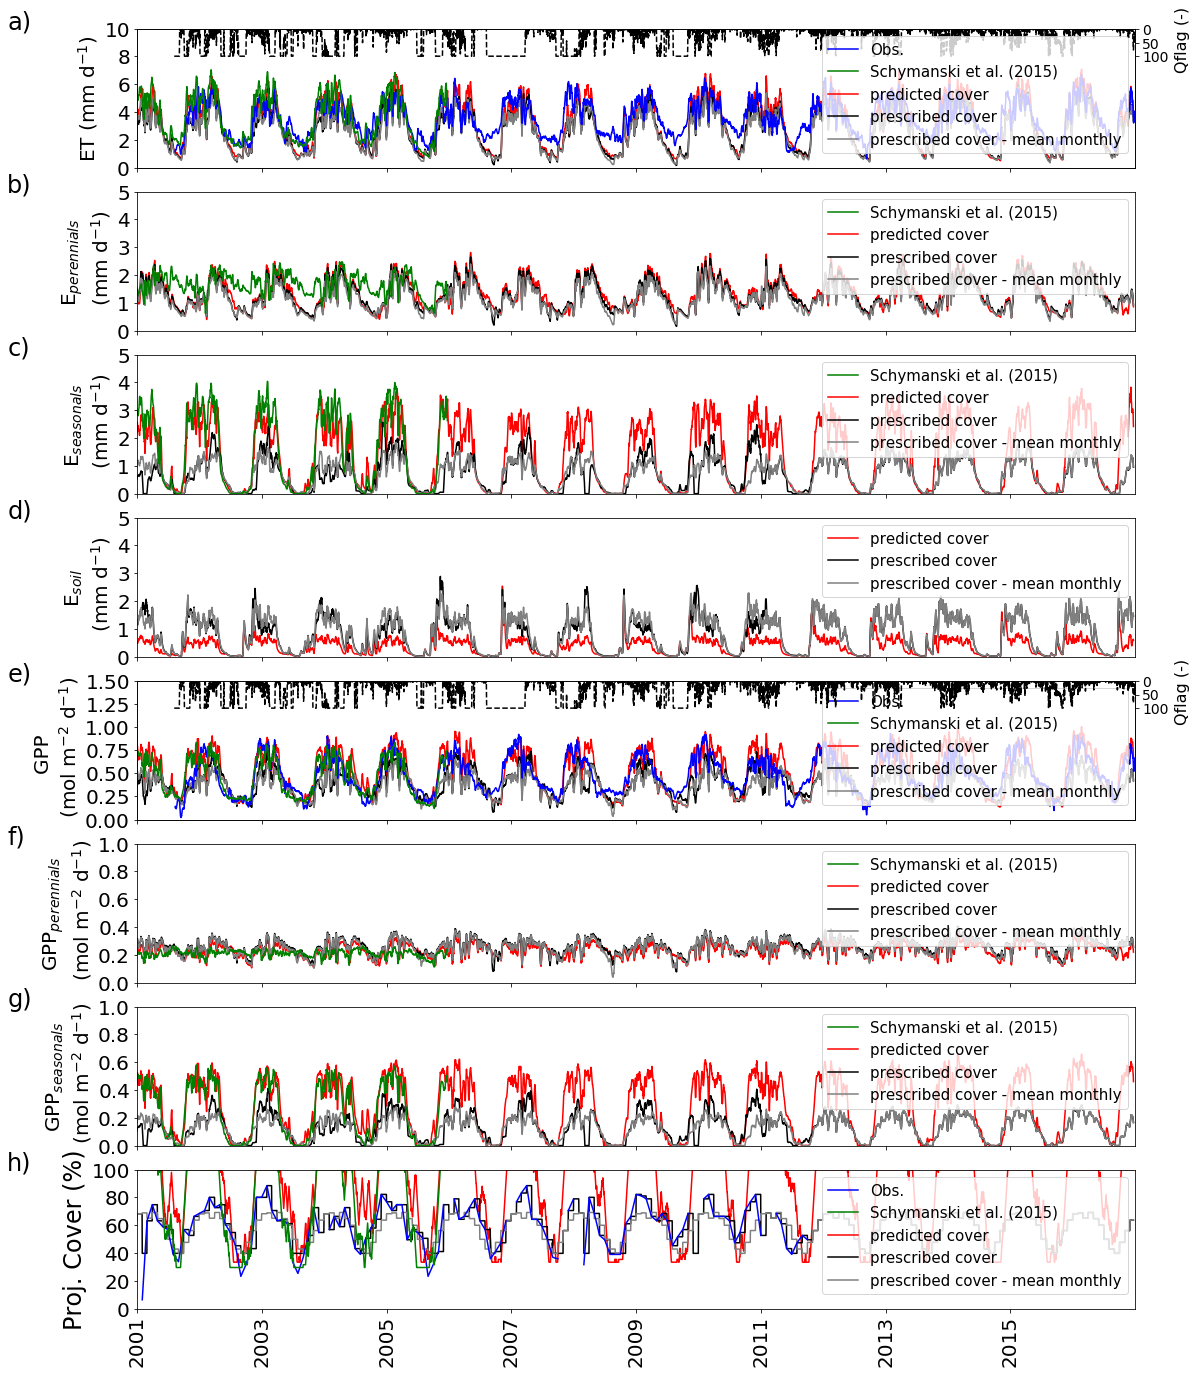

In [7]:
%run ../../src_py/plot_et_etmg_etmt_ass_assg_asst_pc.py \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt \
-ys 2001 -ye 2016 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend True \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly" \
--figsize 16 19 --hpad -3 --sharex --labelsize 20

**Figure S4.2.** Fluxes for Howard Springs from 2001-2016 (subset from 1980-2016) for a) ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, for the VOM with predicted cover (red), prescribed cover (black), prescribed cover with just mean monthly values (gray) and fluxtower observations (blue). Results of Schymanski et al. (2015) are shown in green. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed.

<Figure size 1280x1520 with 0 Axes>

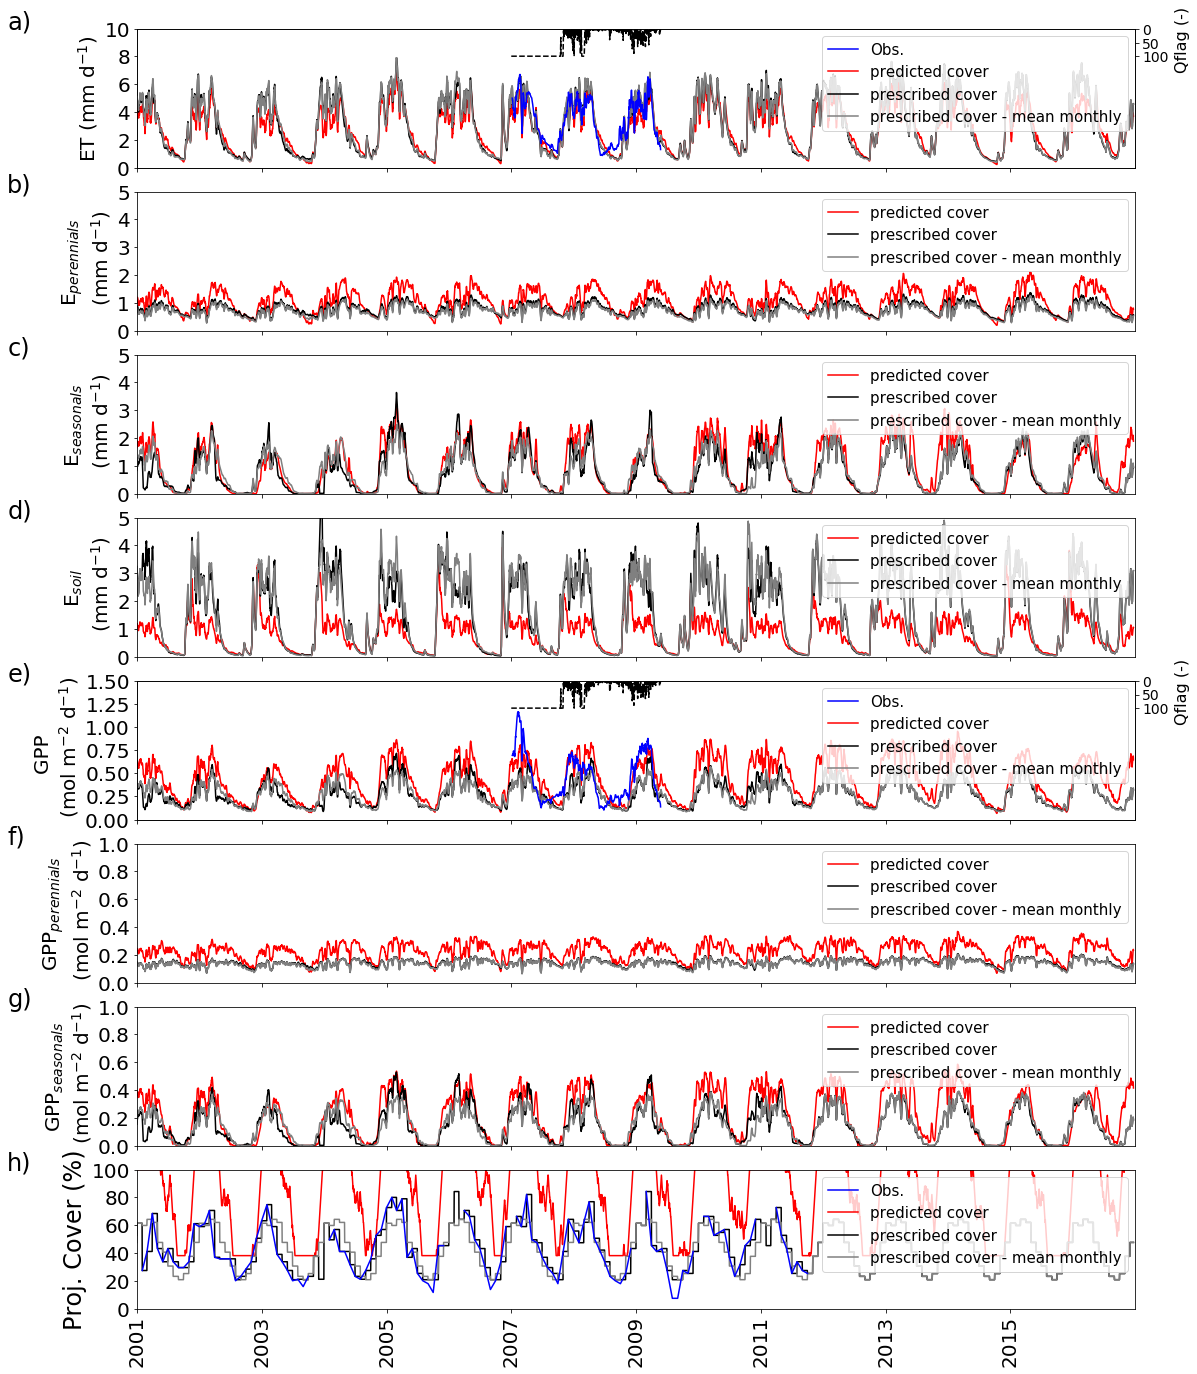

In [8]:
%run ../../src_py/plot_et_etmg_etmt_ass_assg_asst_pc.py \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt \
-ys 2001 -ye 2016 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--assobs ../../data/DINGO/GPPdaily_adelaide.txt --assobs_qc ../../data/DINGO_QC/FcQ_adelaide.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_adelaide.txt --eobs ../../data/DINGO/Ea_adelaide.txt \
--pcobs ../../data/fPAR/fpar_adelaide_v5.txt \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend True \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly" \
--figsize 16 19 --hpad -3 --sharex --labelsize 20

**Figure S4.3.** Fluxes for Adelaide River from 2001-2016 (subset from 1980-2016) for a) total ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) total GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, for the VOM with predicted cover (red), prescribed cover (black), prescribed cover with just mean monthly values (gray) and fluxtower observations (blue). . The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. The results with prescribed vegetation cover are rather similar to the results that optimize vegetation cover. Generally, the VOM deviates a bit more from the observations when vegetation is predicted. 

<Figure size 1280x1520 with 0 Axes>

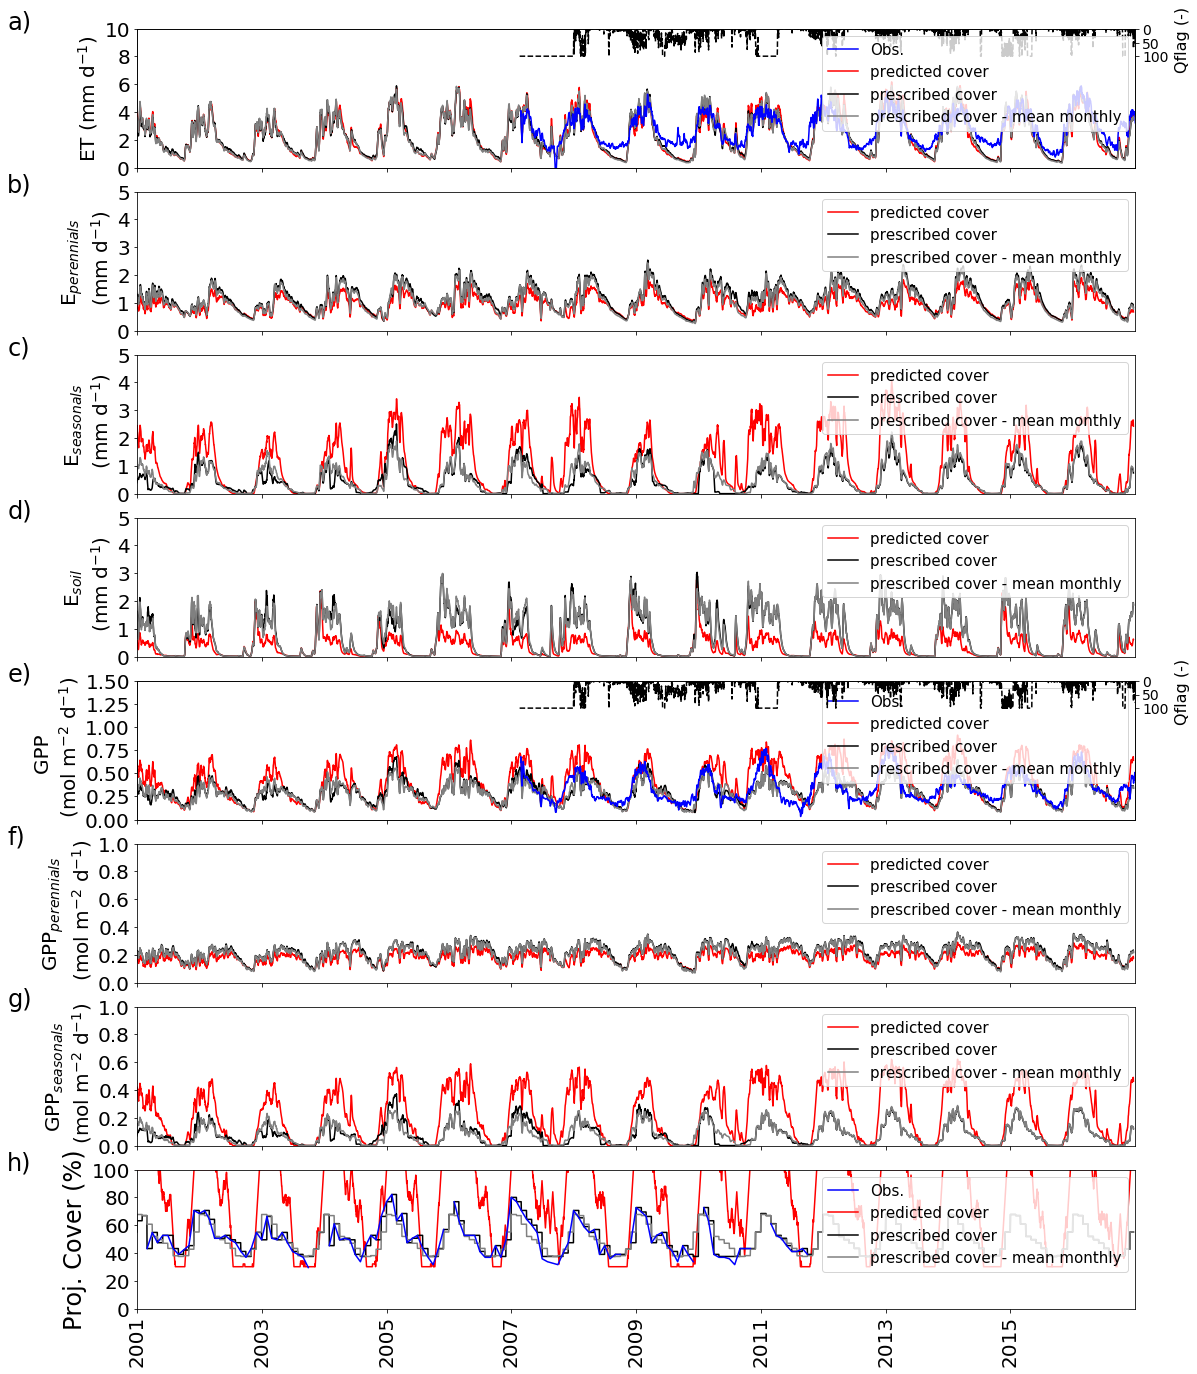

In [9]:
#DalyUncleared
%run ../../src_py/plot_et_etmg_etmt_ass_assg_asst_pc.py \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt \
-ys 2001 -ye 2016 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--assobs ../../data/DINGO/GPPdaily_daly.txt --assobs_qc ../../data/DINGO_QC/FcQ_daly.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_daly.txt --eobs ../../data/DINGO/Ea_daly.txt \
--pcobs ../../data/fPAR/fpar_daly_v5.txt \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend True \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly" \
--figsize 16 19 --hpad -3 --sharex --labelsize 20

**Figure S4.4.** Fluxes for Daly Uncleared from 2001-2016 (subset from 1980-2016) for a) total ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) total GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, for the VOM with predicted cover (red), prescribed cover (black), prescribed cover with just mean monthly values (gray) and fluxtower observations (blue). . The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. The results with prescribed vegetation cover are rather similar to the results that optimize vegetation cover. Generally, the VOM deviates a bit more from the observations when vegetation is predicted. 

<Figure size 1280x1520 with 0 Axes>

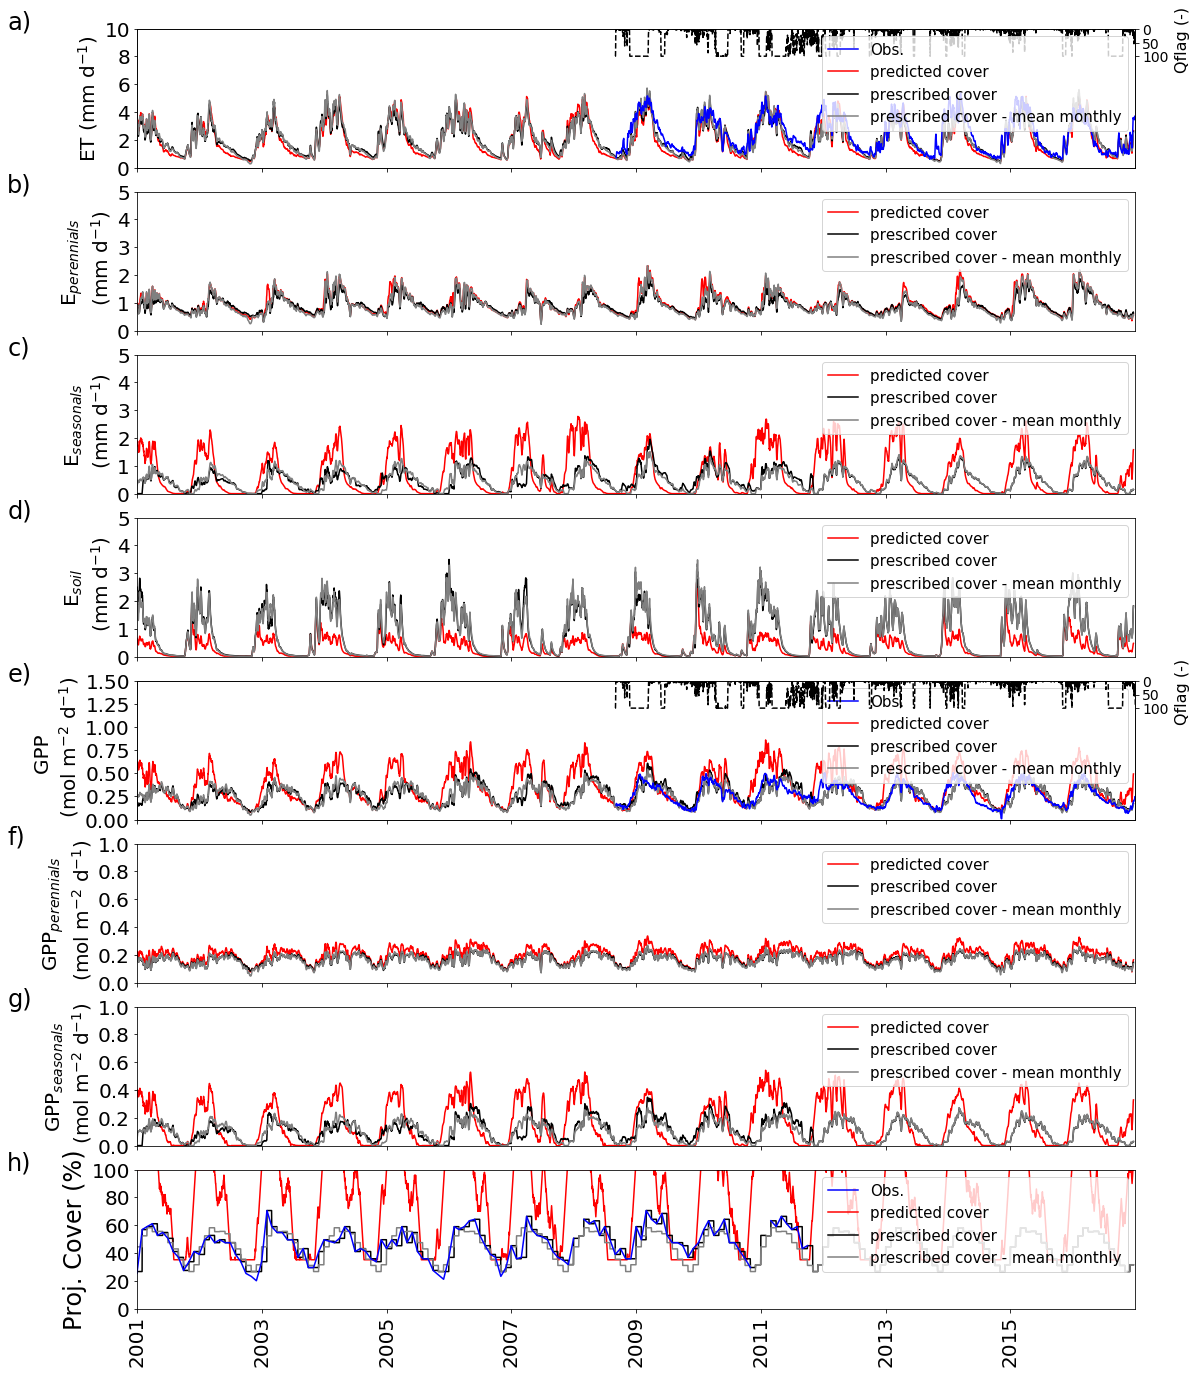

In [10]:
#DryRiver
%run ../../src_py/plot_et_etmg_etmt_ass_assg_asst_pc.py \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt \
-ys 2001 -ye 2016 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--assobs ../../data/DINGO/GPPdaily_dry.txt --assobs_qc ../../data/DINGO_QC/FcQ_dry.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_dry.txt --eobs ../../data/DINGO/Ea_dry.txt \
--pcobs ../../data/fPAR/fpar_dry_v5.txt \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend True \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly" \
--figsize 16 19 --hpad -3 --sharex --labelsize 20


**Figure S4.5.** Fluxes for Dry River from 2001-2016 (subset from 1980-2016) for a) total ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) total GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, for the VOM with predicted cover (red), prescribed cover (black), prescribed cover with just mean monthly values (gray) and fluxtower observations (blue). . The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. The results with prescribed vegetation cover are rather similar to the results that optimize vegetation cover. Generally, the VOM deviates a bit more from the observations when vegetation is predicted. 

<Figure size 1280x1520 with 0 Axes>

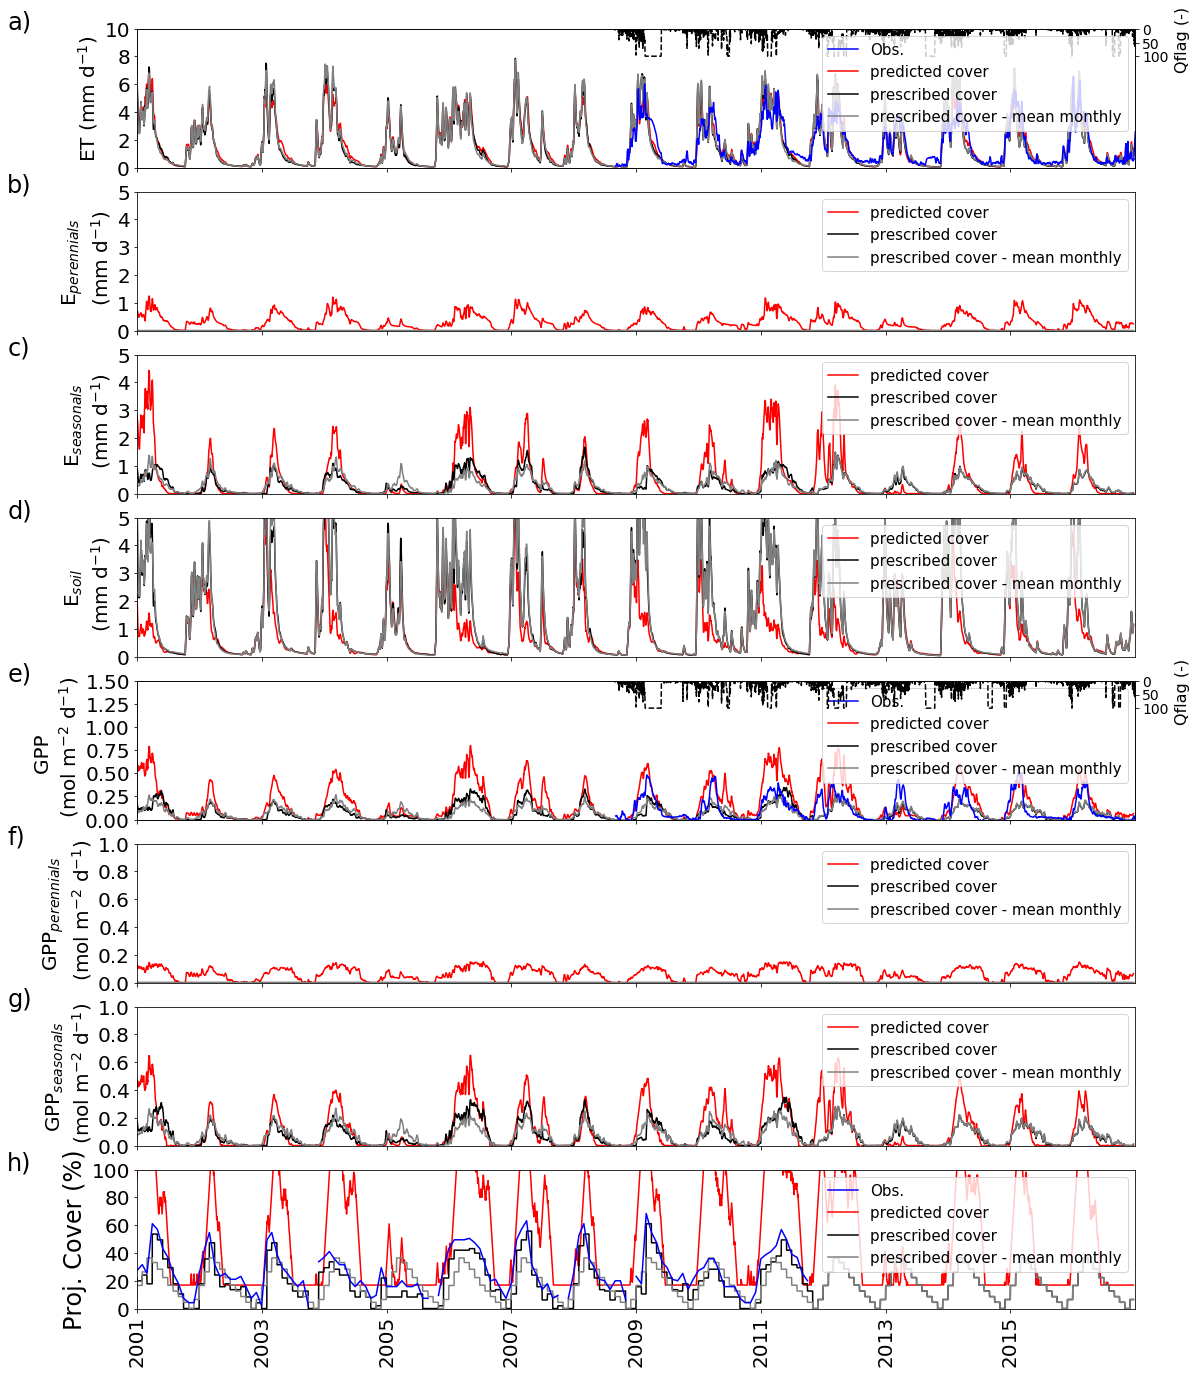

In [11]:
#SturtPlains
%run ../../src_py/plot_et_etmg_etmt_ass_assg_asst_pc.py \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt \
-ys 2001 -ye 2016 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--assobs ../../data/DINGO/GPPdaily_sturt.txt --assobs_qc ../../data/DINGO_QC/FcQ_sturt.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_sturt.txt --eobs ../../data/DINGO/Ea_sturt.txt \
--pcobs ../../data/fPAR/fpar_sturt_v5.txt \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend True \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "predicted cover" "prescribed cover" "prescribed cover - mean monthly" \
--figsize 16 19 --hpad -3 --sharex --labelsize 20

**Figure S4.6.** Fluxes for Sturt Plains from 2001-2016 (subset from 1980-2016) for a) total ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) total GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, for the VOM with predicted cover (red), prescribed cover (black), prescribed cover with just mean monthly values (gray) and fluxtower observations (blue). . The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. The results with prescribed vegetation cover are rather similar to the results that optimize vegetation cover. Generally, the VOM deviates a bit more from the observations when vegetation is predicted. 

## Partitioning of fluxes

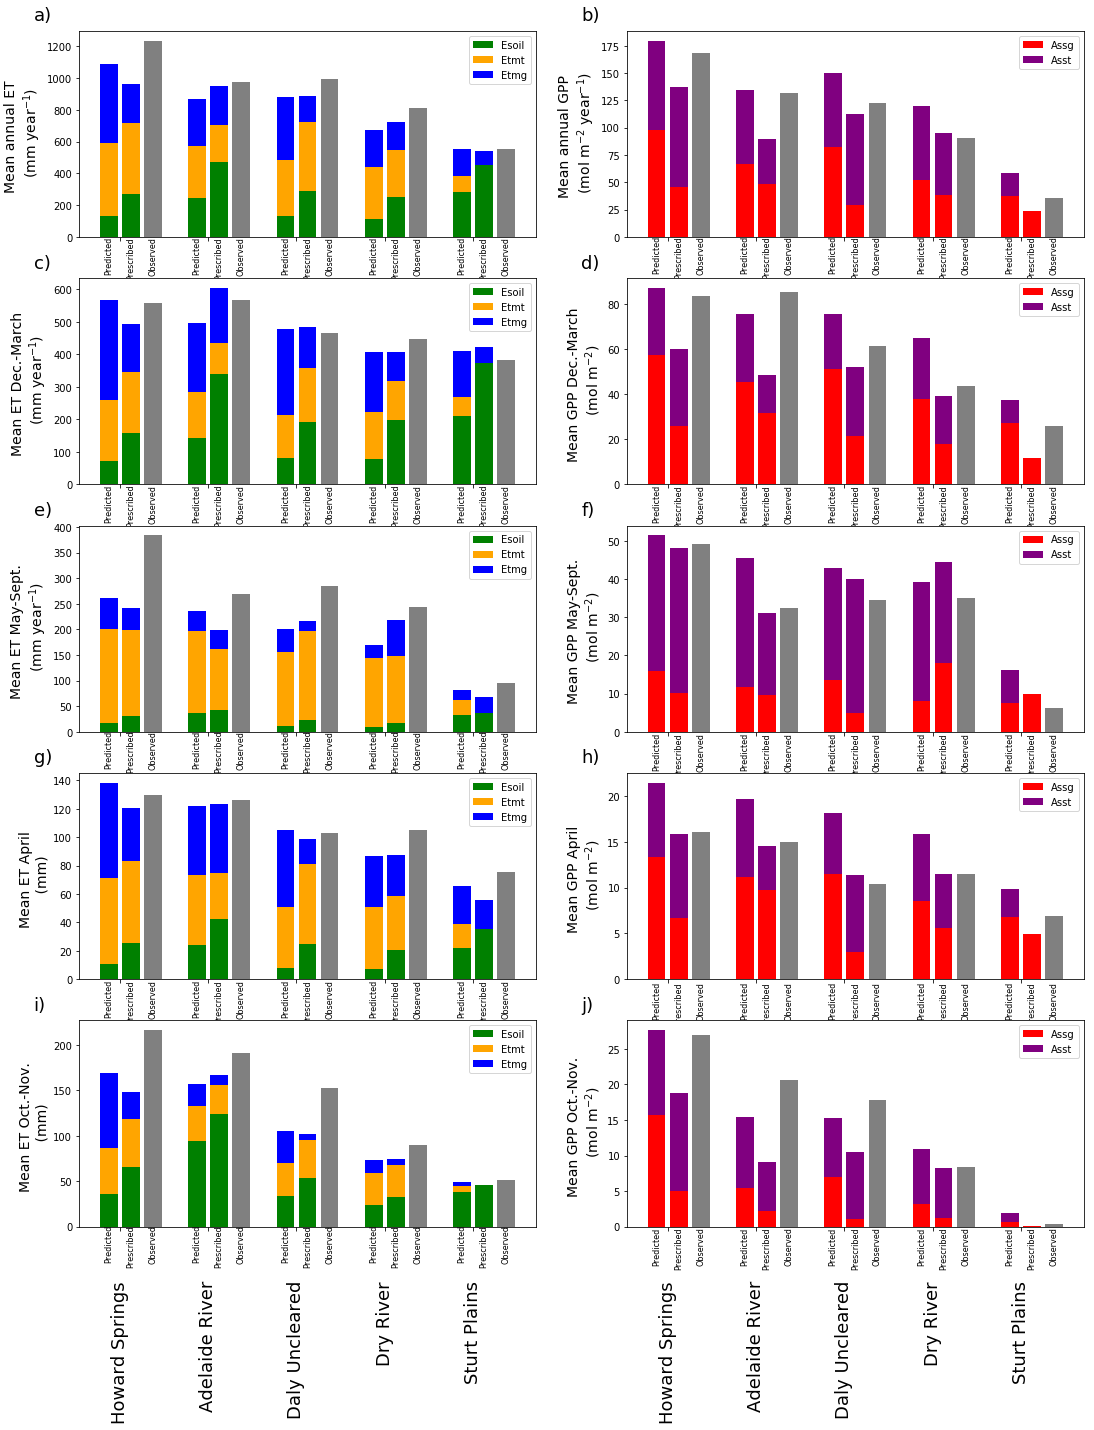

In [12]:
%run ../../src_py/plot_fluxpartitions.py \
--evap_obs ../../data/DINGO/Ea_howard.txt \
../../data/DINGO/Ea_adelaide.txt ../../data/DINGO/Ea_daly.txt \
../../data/DINGO/Ea_dry.txt \
../../data/DINGO/Ea_sturt.txt \
--ass_obs ../../data/DINGO/GPPdaily_howard.txt \
../../data/DINGO/GPPdaily_adelaide.txt ../../data/DINGO/GPPdaily_daly.txt \
../../data/DINGO/GPPdaily_dry.txt ../../data/DINGO/GPPdaily_sturt.txt \
--pred_cover ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt --pres_cover ../../data/VOM_output/additional_analyses/prescribed_cover/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover/SturtPlains/sce_best/results_daily.txt \
--startyear_obs 2002 2007 2008 2009 2009 --endyear_obs 2017 2008 2017 2017 2009 \
--startyear_mod 1995 1995 1995 1995 1995 1995 \
--endyear_mod 2015 2015 2015 2015 2015 2015 \
--sites "Howard Springs" "Adelaide River" "Daly Uncleared" "Dry River" "Sturt Plains" \
--figsize 18 22 --loc_title -0.1 1.05 --labsize 8

**Figure S4.7.** Partitioning of the fluxes for a) evaporatin and b) assimilation, flux tower observations are shown in gray. The prescribed cover always gives lower values of grass assimilation grass transpiration for all sites.

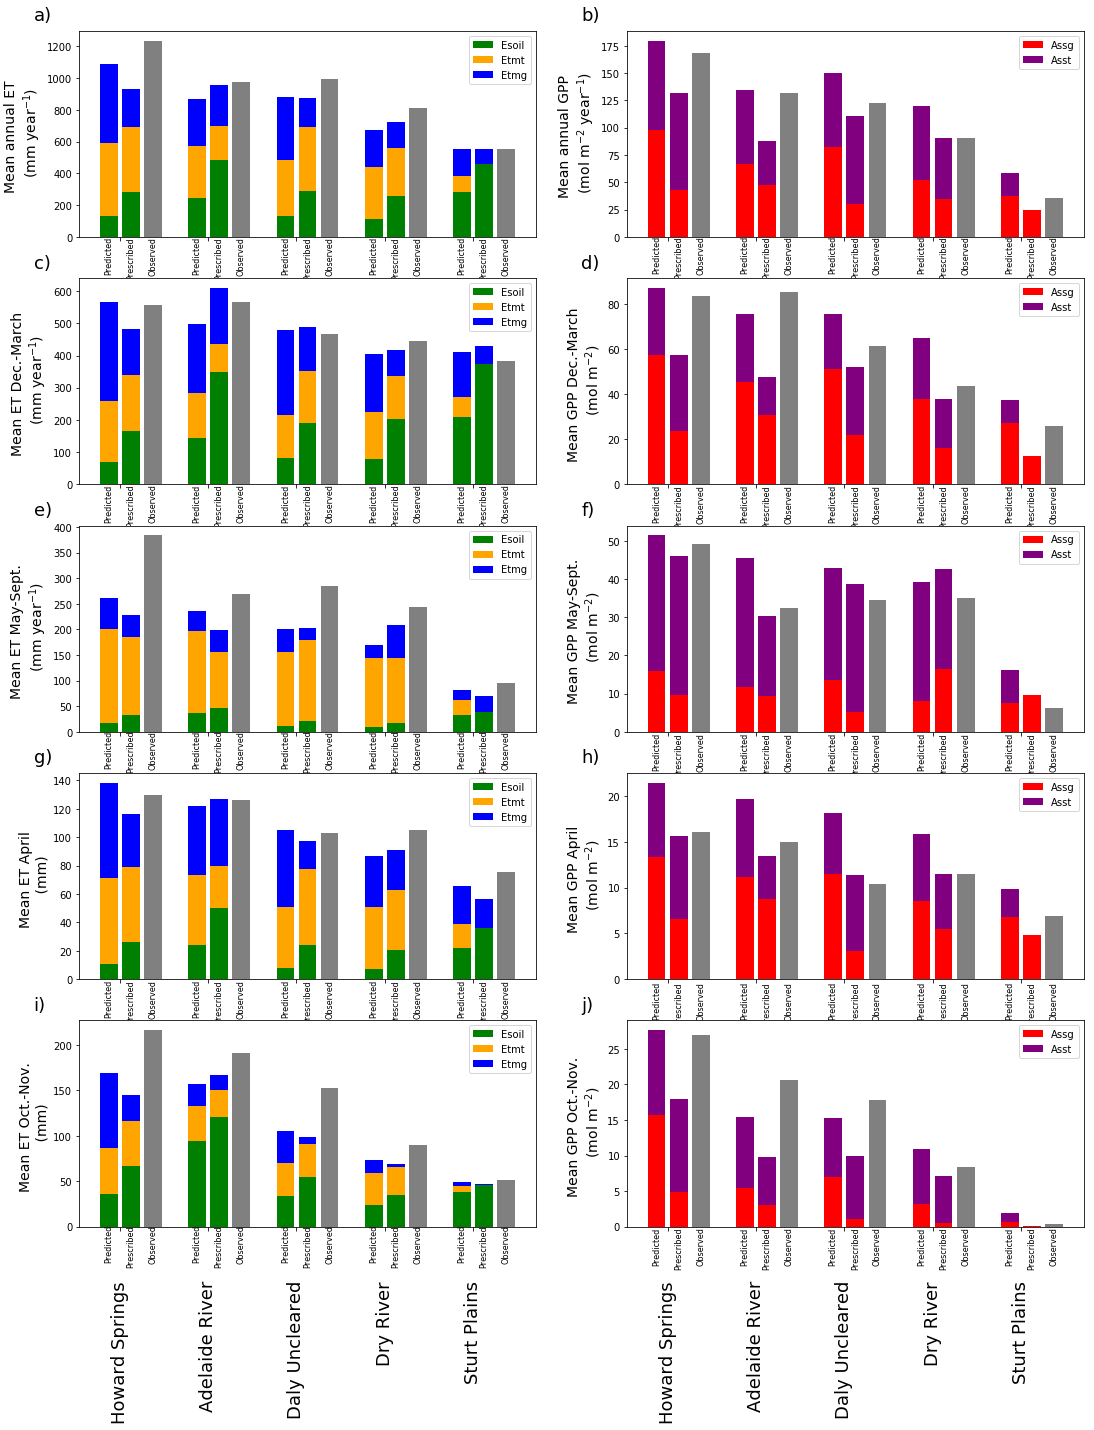

In [13]:
%run ../../src_py/plot_fluxpartitions.py \
--evap_obs ../../data/DINGO/Ea_howard.txt \
../../data/DINGO/Ea_adelaide.txt ../../data/DINGO/Ea_daly.txt \
../../data/DINGO/Ea_dry.txt \
../../data/DINGO/Ea_sturt.txt \
--ass_obs ../../data/DINGO/GPPdaily_howard.txt \
../../data/DINGO/GPPdaily_adelaide.txt ../../data/DINGO/GPPdaily_daly.txt \
../../data/DINGO/GPPdaily_dry.txt ../../data/DINGO/GPPdaily_sturt.txt \
--pred_cover ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt --pres_cover ../../data/VOM_output/additional_analyses/prescribed_cover2/HowardSprings/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/AdelaideRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DalyUncleared/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/DryRiver/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/prescribed_cover2/SturtPlains/sce_best/results_daily.txt \
--startyear_obs 2002 2007 2008 2009 2009 --endyear_obs 2017 2008 2017 2017 2009 \
--startyear_mod 1995 1995 1995 1995 1995 1995 \
--endyear_mod 2015 2015 2015 2015 2015 2015 \
--sites "Howard Springs" "Adelaide River" "Daly Uncleared" "Dry River" "Sturt Plains" \
--figsize 18 22 --loc_title -0.1 1.05 --labsize 8

**Figure S4.8.** Partitioning of the fluxes for a) evaporation and b) assimilation, flux tower observations are shown in gray. The prescribed cover is here based solely on mean monthly values.

## Parameters

<Figure size 1280x400 with 0 Axes>

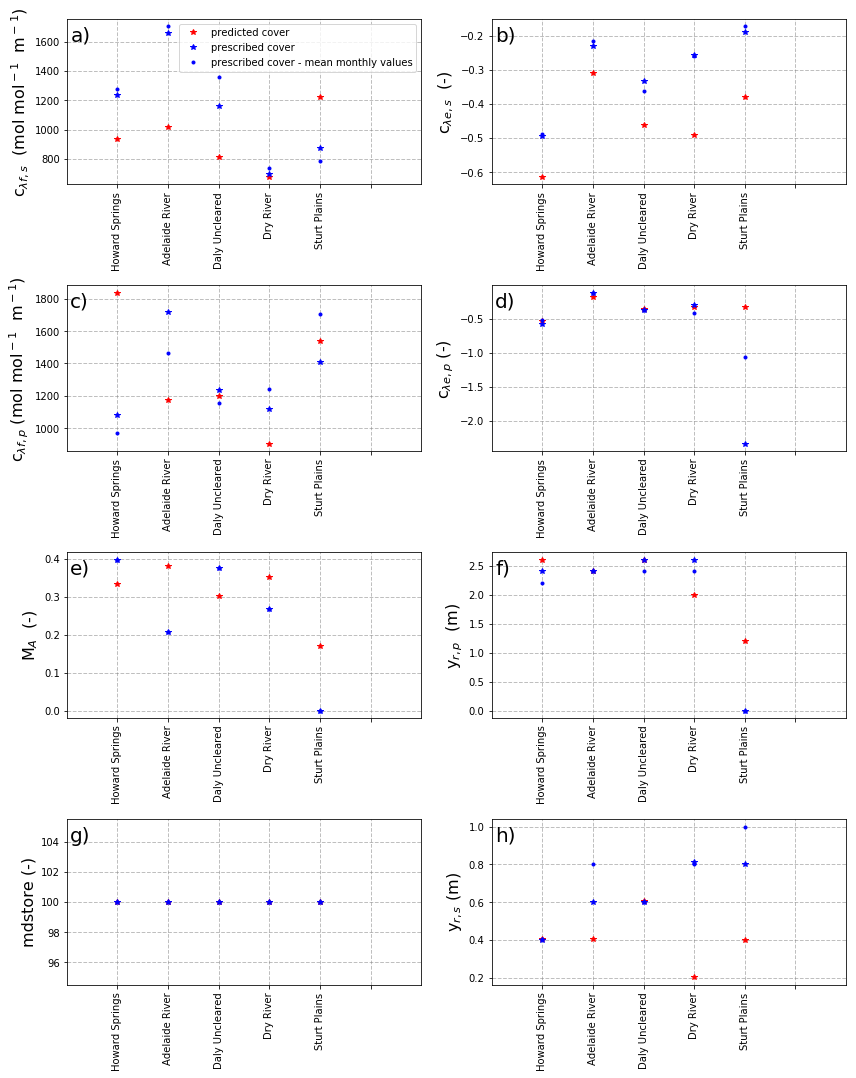

In [14]:
#plot parameters

basin = ["HowardSprings", "AdelaideRiver", "DalyUncleared", "DryRiver", "SturtPlains"]
site_names = ["Howard Springs", "Adelaide River", "Daly Uncleared", "Dry River", "Sturt Plains" ]



fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
#fig, ((ax0, ax1, ax2, ax3, ax4, ax5, ax6) )  = plt.subplots(nrows=1, ncols=7, figsize=(16, 5)) 
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 15)) 
ax = axes.flat


for ibasin in  np.array([0, 1, 2, 3, 4]):  
    
    #loop over files and load
    try:
        params = np.loadtxt("../../work/" + 
             basin[ibasin] + "/freedrainage_cpcff1.0/best/input/pars.txt") #mm/d
    except OSError:
        print("../../work/" + 
             basin[ibasin] + "/freedrainage_cpcff1.0/best/input/pars.txt") #mm/d
  
    try:
        params_pc = np.loadtxt("../../data/VOM_output/additional_analyses/prescribed_cover/" + 
             basin[ibasin] + "/sce_best/pars.txt") #mm/d
    except OSError:
        params_pc = np.loadtxt("../../work/additional_analyses/prescribed_cover/" + 
             basin[ibasin] + "/best/input/pars.txt") #mm/d
        
    try:
        params_pc2 = np.loadtxt("../../data/VOM_output/additional_analyses/prescribed_cover2/" + 
             basin[ibasin] + "/sce_best/pars.txt") #mm/d
    except OSError:
        params_pc2 = np.loadtxt("../../work/additional_analyses/prescribed_cover2/" + 
             basin[ibasin] + "/best/input/pars.txt") #mm/d
        
        
    #for irun in range(0,4):
    if(ibasin == 0):
        ax[0].plot([ibasin], params[0], "r*" , label = "predicted cover" ) 
        ax[0].plot([ibasin], params_pc[0], "b*" , label =  "prescribed cover" ) 
        ax[0].plot([ibasin], params_pc2[0], "b." , label =  "prescribed cover - mean monthly values" ) 

    else:
        ax[0].plot([ibasin], params[0], "r*" ) 
        ax[0].plot([ibasin], params_pc[0], "b*" )
        ax[0].plot([ibasin], params_pc2[0], "b." ) 

        
    ax[1].plot([ibasin], params[1], "r*" , label = "VOM" ) 
    ax[1].plot([ibasin], params_pc[1], "b*"  )
    ax[1].plot([ibasin], params_pc2[1], "b." ) 


    ax[2].plot([ibasin], params[2], "r*" , label = "VOM" ) 
    ax[2].plot([ibasin], params_pc[2], "b*"  ) 
    ax[2].plot([ibasin], params_pc2[2], "b."  ) 

    ax[3].plot([ibasin], params[3], "r*" , label = "VOM" ) 
    ax[3].plot([ibasin], params_pc[3], "b*" )
    ax[3].plot([ibasin], params_pc2[3], "b." )

    ax[4].plot([ibasin], params[4], "r*" , label = "VOM" ) 
    ax[4].plot([ibasin], params_pc[4], "b*"  )
    ax[4].plot([ibasin], params_pc2[4], "b."  ) 

    ax[5].plot([ibasin], params[5], "r*" , label = "VOM" ) 
    ax[5].plot([ibasin], params_pc[5], "b*" ) 
    ax[5].plot([ibasin], params_pc2[5], "b."  ) 

    ax[6].plot([ibasin], params[6], "r*" , label = "VOM" ) 
    ax[6].plot([ibasin], params_pc[6], "b*" ) 
    ax[6].plot([ibasin], params_pc2[6], "b." ) 
    
    ax[7].plot([ibasin], params[7], "r*" , label = "VOM" ) 
    ax[7].plot([ibasin], params_pc[7], "b*") 
    ax[7].plot([ibasin], params_pc2[7], "b.") 


#ax0.set_ylim([0,10])  
ax[0].set_xlim( -1, 6  )     
ax[0].set_xticks( [0,1,2,3,4,5] )  
ax[0].set_xticklabels( site_names, rotation=90 )  
ax[0].set_ylabel(r"c$_{\lambda f,s}$  (mol mol$^-$$^1$  m$^-$$^1$)", size=16 )  
ax[0].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[0].text(0.01, 0.9, "a)", ha='left', va='center', transform=ax[0].transAxes, fontsize=20)
ax[0].legend()

#ax1.set_ylim([0,10])  
ax[1].set_xlim( -1, 6  )     
ax[1].set_xticks( [0,1,2,3,4,5] )  
ax[1].set_xticklabels( site_names, rotation=90 )  
ax[1].set_ylabel(r"c$_{\lambda e,s}$  (-)", size=16 )  
ax[1].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[1].text(0.01, 0.9, "b)", ha='left', va='center', transform=ax[1].transAxes, fontsize=20)

#ax2.set_ylim([0,1]) 
ax[2].set_xlim( -1, 6  ) 
ax[2].set_xticks( [0,1,2,3,4,5] )  
ax[2].set_xticklabels( site_names, rotation=90 )  
ax[2].set_ylabel(r"c$_{\lambda f,p}$ (mol mol$^-$$^1$  m$^-$$^1$)", size=16 )
ax[2].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[2].text(0.01, 0.9, "c)", ha='left', va='center', transform=ax[2].transAxes, fontsize=20)

#ax0.set_ylim([0,1])  
ax[3].set_xlim( -1, 6  )   
ax[3].set_xticks( [0,1,2,3,4,5] )  
ax[3].set_xticklabels( site_names, rotation=90 )  
ax[3].set_ylabel(r"c$_{\lambda e,p}$ (-)", size=16 ) 
ax[3].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[3].text(0.01, 0.9, "d)", ha='left', va='center', transform=ax[3].transAxes, fontsize=20)

#ax1.set_ylim([0,10])  
ax[4].set_xlim( -1, 6  )     
ax[4].set_xticks( [0,1,2,3,4,5] )  
ax[4].set_xticklabels( site_names, rotation=90 )  
ax[4].set_ylabel(r"M$_A$  (-)", size=16 )  
ax[4].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[4].text(0.01, 0.9, "e)", ha='left', va='center', transform=ax[4].transAxes, fontsize=20)

#ax2.set_ylim([0,1]) 
ax[5].set_xlim( -1, 6  ) 
ax[5].set_xticks( [0,1,2,3,4,5] )  
ax[5].set_xticklabels( site_names, rotation=90 )  
ax[5].set_ylabel(r"y$_{r,p}$  (m)", size=16 )  
ax[5].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[5].text(0.01, 0.9, "f)", ha='left', va='center', transform=ax[5].transAxes, fontsize=20)

ax[6].set_xlim( -1, 6  ) 
ax[6].set_xticks( [0,1,2,3,4,5] )  
ax[6].set_xticklabels( site_names, rotation=90 )  
ax[6].set_ylabel("mdstore (-)", size=16 )  
ax[6].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[6].text(0.01, 0.9, "g)", ha='left', va='center', transform=ax[6].transAxes, fontsize=20)

ax[7].set_xlim( -1, 6  ) 
ax[7].set_xticks( [0,1,2,3,4,5] )  
ax[7].set_xticklabels( site_names, rotation=90 )  
ax[7].set_ylabel(r"y$_{r,s}$ (m)", size=16 )  
ax[7].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax[7].text(0.01, 0.9, "h)", ha='left', va='center', transform=ax[7].transAxes, fontsize=20)


plt.tight_layout()
    
plt.show()


**Figure S4.9.** Optimal vegetation parameters for prescribed cover (blue) and predicted cover (red) , for a) and b) the two parameters $c_{\lambda f,s}$ and  $c_{\lambda e,s}$ effecting the water use for perennial vegetation, c) and d) the two parameters $c_{\lambda f,p}$ and $c_{\lambda e,p}$ effecting the water use for seasonal vegetation, e) vegetation cover of the perennial vegetation $M_{A,p}$, f) the rooting depth for the perennial vegetation $y_{r,p}$ and g) the plant water storage (fixed) and h) the rooting depth for the seasonal vegetation $y_{r,s}$. A clear pattern seems absent, except for grass rooting depths that seem to increase for the prescribed cover at drier sites.

## Relative errors


<Figure size 1280x400 with 0 Axes>

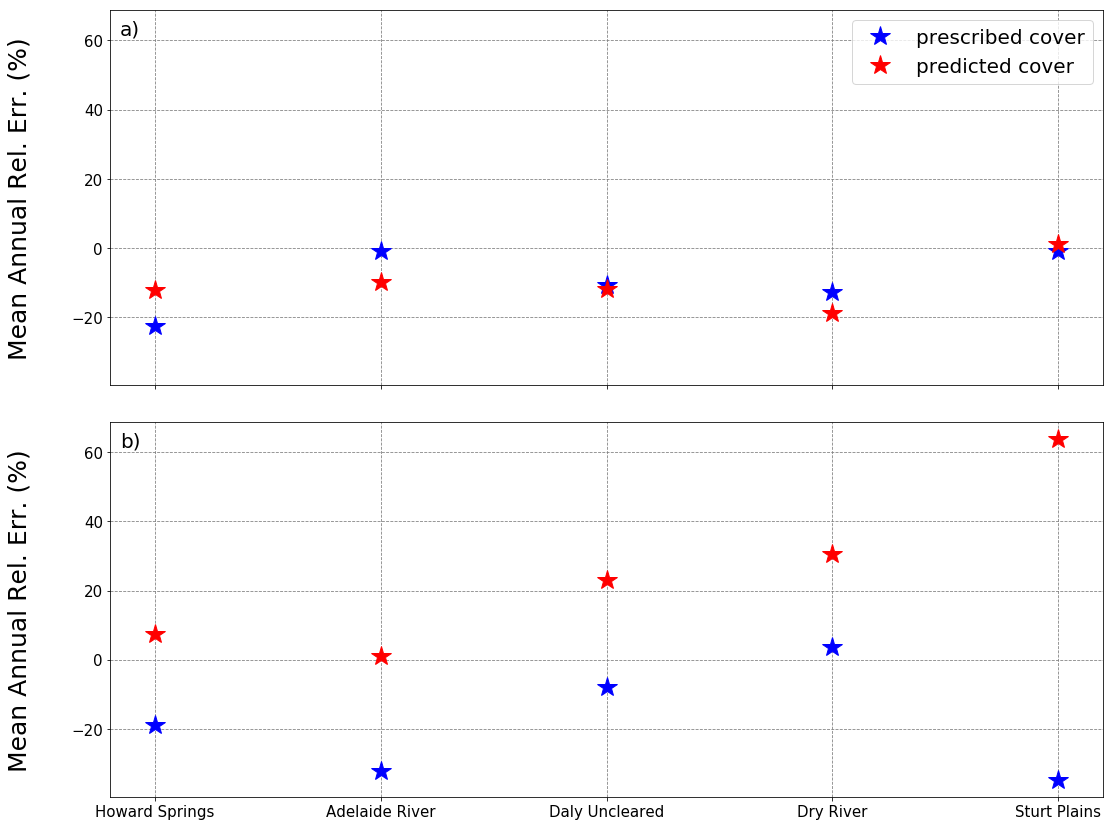

In [15]:
#load data
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver",  "DalyUncleared", "DryRiver", "SturtPlains" ]
site_names = ["Howard Springs", "Adelaide River",  "Daly Uncleared", "Dry River", "Sturt Plains" ]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=2, ncols=1, figsize=(16, 12), sharex=True, sharey=True)   


i = 0

skipped = 0
i_basin = 0
add_labels = 1

#loop over all sites
for site in study_sites:
    

    try:
        pc_ebest_stats = np.genfromtxt("../../data/VOM_output/additional_analyses/prescribed_cover/" + 
         site +  "/sce_stats_best/evap_beststats.txt") 

        pc_assbest_stats = np.genfromtxt("../../data/VOM_output/additional_analyses/prescribed_cover/" + 
         site +  "/sce_stats_best/ass_beststats.txt")              

        ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff1.0/sce_stats_best/evap_beststats.txt") #mm/d

        assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff1.0/sce_stats_best/ass_beststats.txt") #mm/d          
        
        if(add_labels  == 1):
            ax[0].plot(i_basin, pc_ebest_stats[1]*100, '*b', markersize=20, label="prescribed cover" ) 
            ax[1].plot(i_basin, pc_assbest_stats[1]*100, '*b', markersize=20, label="prescribed cover" ) 
            ax[0].plot(i_basin, ebest_stats[1]*100, '*r', markersize=20, label="predicted cover" ) 
            ax[1].plot(i_basin, assbest_stats[1]*100, '*r', markersize=20, label="predicted" )
            add_labels = 0            
        else:
            ax[0].plot(i_basin, pc_ebest_stats[1]*100, '*b', markersize=20 ) 
            ax[1].plot(i_basin, pc_assbest_stats[1]*100, '*b', markersize=20 ) 
            ax[0].plot(i_basin, ebest_stats[1]*100, '*r', markersize=20 ) 
            ax[1].plot(i_basin, assbest_stats[1]*100, '*r', markersize=20) 

    except IOError:
        skipped = skipped + 1 
        #print("../../data/VOM_output/additional_analyses/prescribed_cover/" + 
        #site +  "/sce_stats_best/ass_beststats.txt")
       
        
        
    i_basin = i_basin + 1        

  
    ax[0].grid(b=True, which='major', color='grey', linestyle='--')
    ax[1].grid(b=True, which='major', color='grey', linestyle='--')

    for tick in ax[0].xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in ax[0].yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
        
    for tick in ax[1].xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in ax[1].yaxis.get_major_ticks():
        tick.label.set_fontsize(15)        
        
        
ax[0].set_xticks( [0,1,2,3,4] )  
ax[0].set_xticklabels( site_names ) 
ax[0].legend(fontsize = 20)
ax[0].set_ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)
ax[0].text(0.01, 0.95, "a)", ha='left', va='center', transform=ax[0].transAxes, fontsize=20)

ax[1].set_xticks( [0,1,2,3,4] )  
ax[1].set_xticklabels( site_names ) 
#ax[1].legend(fontsize = 20, loc="center left")
ax[1].set_ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)
ax[1].text(0.01, 0.95, "b)", ha='left', va='center', transform=ax[1].transAxes, fontsize=20)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#plt.xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size = 25, labelpad=40)


plt.tight_layout()
plt.show()

    


**Figure S4.10.** The relative errors between the mean annual fluxes for a) ET and b) GPP, with prescribed cover in blue and predicted cover in red. Similar results as the timeseries in Figures S4.2 - S4.6, it can be noted that there are hardly any difference for evapo-transpiration, but for GPP the relative error moves towards more negative values (i.e. GPP is always lower). 